### Erdős–Rényi Model

&nbsp;

You may wonder, isn't this script called Watts–Strogatz model? Sure, but Erdős–Rényi model is the foundation of Watts–Strogatz model. It is reasonable to make an introduction on the most basic form of random graph before we move onto the sophisticated one. In Erdős–Rényi model, any random pair of vertices are connected at the same probability. Thus, the model follows binomial distribution. When the number of vertices is large enough (converged to infinity), the model follows Poisson distribution.

Unfortunately, the quality of pdf isn't exactly top-notch since the original paper was published in 1959. Given the simplicity of the model, any university material should be able to cover its content.

http://snap.stanford.edu/class/cs224w-readings/erdos59random.pdf

http://snap.stanford.edu/class/cs224w-readings/erdos60random.pdf

&nbsp;

In [1]:
import os
os.chdir('K:/ecole/github')
import matplotlib.pyplot as plt
import numpy as np

#graph adt
#check the below link for more details
# https://github.com/je-suis-tm/graph-theory/blob/master/graph.py
import graph

In [2]:
ermodel=graph.graph()

In [3]:
#initial parameters
num_of_v=200

prob=0.3

In [4]:
#connect two vertices based upon probability
for i in range(num_of_v):
    for j in range(i+1,num_of_v):
        if np.random.uniform()<prob:
            ermodel.append(i,j,1)
            ermodel.append(j,i,1)

&nbsp;

##### Degree Distribution

&nbsp;

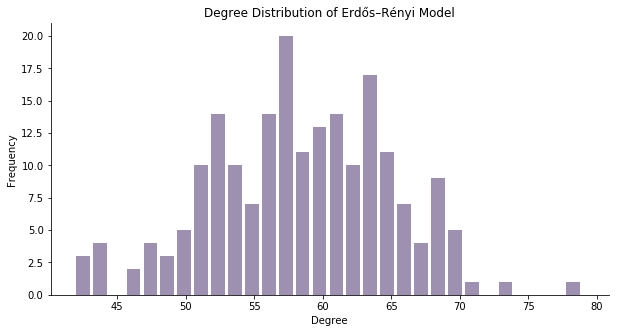

In [5]:
#get degree
degree_dst=[ermodel.degree(node) for node in ermodel.vertex()]

#viz
ax=plt.figure(figsize=(10,5)).add_subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.hist(degree_dst,bins=30,width=1,color='#9e90b0')
plt.title('Degree Distribution of Erdős–Rényi Model')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

##### NetworkX

&nbsp;

In [6]:
import networkx as nx

G=nx.random_graphs.erdos_renyi_graph(num_of_v,prob)

&nbsp;

### Lattice

&nbsp;

Wait, still not Watts-Strogatz model? Tranquillo, a lil bit foreplay kills nobody. Lattice is basically a grid. Look at the pyramids in Louvre or Montparnasse in southbank. Those glass windows form a squared lattice.

&nbsp;

In [7]:
lattice=graph.graph()

In [8]:
#initial parameters
num_of_v=100
num_of_neighbors=4

In [9]:
assert num_of_neighbors%2==0,"number of neighbors must be even number"

In [10]:
#we are creating a regular ring lattice
for i in range(num_of_v):
    for j in range(1,num_of_neighbors//2+1):
        lattice.append(i,i+j if i+j<num_of_v else i+j-num_of_v,1)   
        lattice.append(i,i-j if i-j>=0 else i-j+num_of_v,1)
        lattice.append(i+j if i+j<num_of_v else i+j-num_of_v,i,1)   
        lattice.append(i-j if i-j>=0 else i-j+num_of_v,i,1)

&nbsp;

##### Degree Distribution

There is no point of degree distribution since each vertex has 4 edges.

&nbsp;

##### NetworkX

&nbsp;

In [11]:
#networkx can create a squared lattice
G=nx.grid_2d_graph(4,4)

#to create a ring lattice
#we d better leverage its watts strogatz model
#set rewiring probability at 0
G=nx.random_graphs.watts_strogatz_graph(10,4,0)

&nbsp;

### Watts-Strogatz Model

&nbsp;

Third time is the charm. Here is the climax of the script. Watts-Strogatz model, so-called small world effect, is somewhere between ring lattice and Erdős–Rényi model. Its partial regularity creates clusters in the structure and its partial randomness brings disorder to the degree distribution. The key parameter is the probability of rewiring. When the probability is zero, it becomes a ring lattice. When the probability is one, it becomes Erdős–Rényi model.

&nbsp;

In [12]:
wsmodel=graph.graph()

In [13]:
#initial parameters
num_of_v=200
num_of_neighbors=60
prob=0.3

In [14]:
assert num_of_neighbors%2==0,"number of neighbors must be even number"

In [15]:
#first we create a regular ring lattice
for i in range(num_of_v):
    for j in range(1,num_of_neighbors//2+1):
        wsmodel.append(i,i+j if i+j<num_of_v else i+j-num_of_v,1)   
        wsmodel.append(i,i-j if i-j>=0 else i-j+num_of_v,1)
        wsmodel.append(i+j if i+j<num_of_v else i+j-num_of_v,i,1)   
        wsmodel.append(i-j if i-j>=0 else i-j+num_of_v,i,1)

In [16]:
#rewiring
#remove a random edge and create a random edge
for i in wsmodel.vertex():
    for j in wsmodel.edge(i):
        if np.random.uniform()<prob:
            wsmodel.disconnect(i,j)
            wsmodel.disconnect(j,i)
            rewired=np.random.choice(wsmodel.vertex())
            wsmodel.append(i,rewired,1)
            wsmodel.append(rewired,i,1)

&nbsp;

##### Degree Distribution

&nbsp;

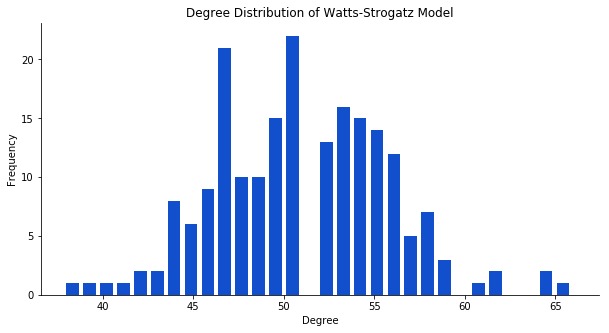

In [17]:
#get degree
degree_dst=[wsmodel.degree(node) for node in wsmodel.vertex()]

#viz
ax=plt.figure(figsize=(10,5)).add_subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.hist(degree_dst,bins=30,width=0.7,color='#124fcc')
plt.title('Degree Distribution of Watts-Strogatz Model')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

##### NetworkX

&nbsp;

In [18]:
#create an erdős rényi
#effectively 20 vertices with probability at 0.2
ger=nx.random_graphs.watts_strogatz_graph(20,4,1)

#create a ring lattice
grl=nx.random_graphs.watts_strogatz_graph(20,4,0)

#create a watts strogatz
gws=nx.random_graphs.watts_strogatz_graph(20,4,0.4)

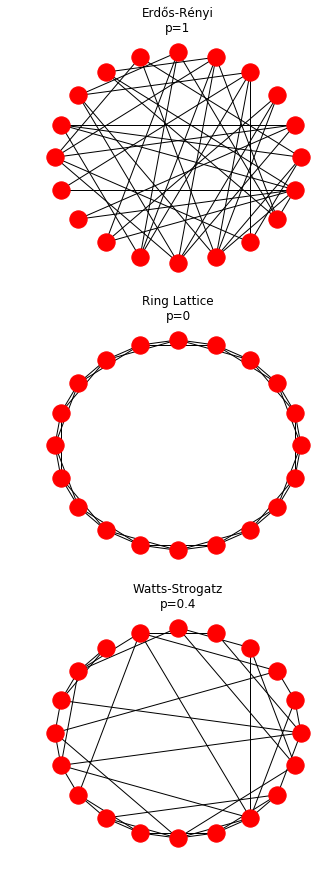

In [19]:
#viz
ax=plt.figure(figsize=(5,15))
ax.add_subplot(311)
nx.draw_circular(ger)
plt.title('Erdős-Rényi\np=1')
ax.add_subplot(312)
nx.draw_circular(grl)
plt.title('Ring Lattice\np=0')
ax.add_subplot(313)
nx.draw_circular(gws)
plt.title('Watts-Strogatz\np=0.4')
plt.show()